1. Image Classification

In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

In [3]:
# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [4]:
x_train, x_test = x_train / 255.0, x_test / 255.0

CNN Model

In [5]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 classes
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [7]:
model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 76s 48ms/step - accuracy: 0.4008 - loss: 1.6528 - val_accuracy: 0.5857 - val_loss: 1.1750
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 84s 54ms/step - accuracy: 0.6039 - loss: 1.1209 - val_accuracy: 0.6365 - val_loss: 1.0280
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 134s 49ms/step - accuracy: 0.6625 - loss: 0.9703 - val_accuracy: 0.6533 - val_loss: 0.9869
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 86s 55ms/step - accuracy: 0.6928 - loss: 0.8787 - val_accuracy: 0.6676 - val_loss: 0.9553
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 122s 43ms/step - accuracy: 0.7192 - loss: 0.8039 - val_accuracy: 0.6903 - val_loss: 0.8958
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 69s 44ms/step - accuracy: 0.7448 - loss: 0.7342 - val_accuracy: 0.6929 - val_loss: 0.9103
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 79s 42ms/step - accuracy: 0.7619 - loss: 0.6757 - val_accuracy: 0.6989 - val_loss: 0.9018
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 43ms/step - accuracy: 0.7808

In [9]:
# Save the entire model to a file
model.save("my_cnn_model.keras")  # Saves as a single HDF5 file

In [3]:
model = tf.keras.models.load_model("my_cnn_model.keras")

2. Object Detection

In [12]:
import tensorflow as tf
import tensorflow_hub as hub
import cv2
import numpy as np
import matplotlib.pyplot as plt

We’re using a pre-trained Faster R-CNN model from TensorFlow Hub to detect objects in an image.

In [12]:
pip install --upgrade tensorflow tensorflow-hub

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 37.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.5/615.5 MB 824.0 kB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.4.1
    Uninstalling ml-dtypes-0.4.1:
      Successfully uninstalled ml-dtypes-0.4.1
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.18.0
    Uninstalling tensorflow-2.18.0:
      Successfully uninstalled tensorflow-2.18.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-decision-forests 1.11.0 requires tensorflow==2.18.0, but you have tensorflow 2.18.1 which is incompatible.


In [14]:
detector = hub.load("https://tfhub.dev/tensorflow/ssd_mobilenet_v2/2")

In [22]:
def load_image(path):
    img = tf.io.read_file(path)
    img = tf.image.decode_jpeg(img, channels=3)
    return tf.image.convert_image_dtype(img, tf.float32)

img_path = 'dog.jpeg'  # Change this to your image filename
img = load_image(img_path)

In [24]:
result = detector(img[tf.newaxis, ...])  # Add batch dimension

TypeError: Binding inputs to tf.function failed due to `Can not cast TensorSpec(shape=(1, 275, 183, 3), dtype=tf.float32, name=None) to TensorSpec(shape=(1, None, None, 3), dtype=tf.uint8, name=None)`. Received args: (<tf.Tensor: shape=(1, 275, 183, 3), dtype=float32, numpy=
array([[[[0.5568628 , 0.6862745 , 0.24313727],
         [0.49411768, 0.61960787, 0.19215688],
         [0.4431373 , 0.5411765 , 0.17254902],
         ...,
         [0.42352945, 0.45882356, 0.10980393],
         [0.3803922 , 0.41960788, 0.08235294],
         [0.36078432, 0.39607847, 0.07843138]],

        [[0.5529412 , 0.68235296, 0.2392157 ],
         [0.4901961 , 0.6156863 , 0.19607845],
         [0.44705886, 0.54509807, 0.1764706 ],
         ...,
         [0.41960788, 0.45098042, 0.1137255 ],
         [0.38823533, 0.42352945, 0.09803922],
         [0.37254903, 0.4156863 , 0.10588236]],

        [[0.54509807, 0.67058825, 0.23529413],
         [0.4901961 , 0.6156863 , 0.19607845],
         [0.454902  , 0.5529412 , 0.18431373],
         ...,
         [0.4039216 , 0.43529415, 0.10196079],
         [0.3921569 , 0.427451  , 0.10980393],
         [0.38431376, 0.427451  , 0.12156864]],

        ...,

        [[0.7058824 , 0.73333335, 0.7725491 ],
         [0.7058824 , 0.73333335, 0.76470596],
         [0.7058824 , 0.73333335, 0.76470596],
         ...,
         [0.34901962, 0.54901963, 0.18431373],
         [0.3803922 , 0.5764706 , 0.19607845],
         [0.4156863 , 0.6039216 , 0.21568629]],

        [[0.69803923, 0.7254902 , 0.7490196 ],
         [0.69803923, 0.7254902 , 0.7490196 ],
         [0.7058824 , 0.7254902 , 0.7411765 ],
         ...,
         [0.4039216 , 0.59607846, 0.24705884],
         [0.37254903, 0.5568628 , 0.19607845],
         [0.40784317, 0.5803922 , 0.20784315]],

        [[0.6862745 , 0.7137255 , 0.7372549 ],
         [0.6862745 , 0.7137255 , 0.7372549 ],
         [0.69411767, 0.7137255 , 0.7294118 ],
         ...,
         [0.4431373 , 0.6313726 , 0.29411766],
         [0.3803922 , 0.56078434, 0.20784315],
         [0.40784317, 0.5764706 , 0.21568629]]]], dtype=float32)>,) and kwargs: {} for signature: (input_tensor: TensorSpec(shape=(1, None, None, 3), dtype=tf.uint8, name=None)).

NameError: name 'result' is not defined

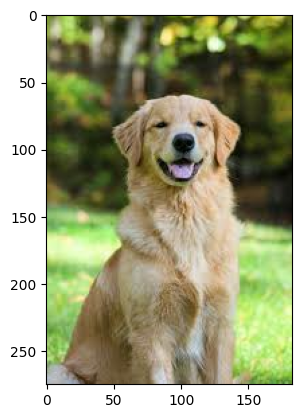

In [23]:
# Show detected objects
import matplotlib.pyplot as plt
from PIL import Image

image_np = np.array(img)
plt.imshow(image_np)

for i in range(len(result['detection_scores'][0])):
    score = result['detection_scores'][0][i].numpy()
    if score > 0.5:
        box = result['detection_boxes'][0][i].numpy()
        ymin, xmin, ymax, xmax = box
        h, w, _ = image_np.shape
        cv2.rectangle(image_np, (int(xmin*w), int(ymin*h)), (int(xmax*w), int(ymax*h)), (255, 0, 0), 2)

plt.imshow(image_np)
plt.axis("off")
plt.show()

3. Image Segmentation

In [25]:
model = hub.load("https://tfhub.dev/tensorflow/deeplabv3/1")

OSError: https://tfhub.dev/tensorflow/deeplabv3/1 does not appear to be a valid module.

In [ ]:
def segment_image(image_path):
    img = load_image(image_path)
    resized_img = tf.image.resize(img, (513, 513))[tf.newaxis, :]
    output = model(resized_img)['default'][0]
    mask = tf.argmax(output, axis=-1)
    mask = mask.numpy()

    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    plt.imshow(img)
    plt.title("Original Image")

    plt.subplot(1,2,2)
    plt.imshow(mask)
    plt.title("Segmentation Mask")
    plt.show()

segment_image("your_image.jpg")  # Replace with actual image path

4. Image Denoising

In [27]:
from tensorflow.keras.layers import Input, Conv2D, UpSampling2D
from tensorflow.keras.models import Model
import numpy as np

In [28]:
# Add noise to images
def add_noise(images):
    noise = np.random.normal(0, 0.1, images.shape)
    return np.clip(images + noise, 0., 1.)

In [29]:
# Use MNIST dataset for simplicity
(x_train, _), (x_test, _) = tf.keras.datasets.mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_train_noisy = add_noise(x_train)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [30]:
# Build autoencoder
input_img = Input(shape=(28, 28, 1))
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = UpSampling2D((2, 2))(x)
x = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)
autoencoder = Model(input_img, x)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [31]:
# Train autoencoder
autoencoder.fit(x_train_noisy, x_train,
                epochs=10,
                batch_size=128,
                shuffle=True)

Epoch 1/10


ValueError: Arguments `target` and `output` must have the same shape. Received: target.shape=(None, 28, 28, 1), output.shape=(None, 56, 56, 1)

In [32]:
# Denoise some images
decoded_imgs = autoencoder.predict(x_train_noisy[:10])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step


ValueError: cannot reshape array of size 3136 into shape (28,28)

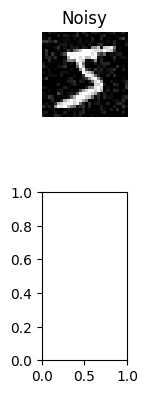

In [33]:
# Display result
for i in range(5):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_train_noisy[i].reshape(28, 28), cmap='gray')
    plt.title("Noisy")
    plt.axis('off')

    plt.subplot(2, 5, i+6)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
    plt.title("Denoised")
    plt.axis('off')

plt.show()